# Name : Sanjayan MS
# email : sanjayanms1998@gmail.com

# Objective

The project demands a machine learning model for predicting fraudulent transactions for a financial company.
The population data is in csv format having 6362620 rows and 10 columns. The data is analyzed from a learning perspective in order to find missing values, outliers and the variance of each feature. The data is then sampled using stratified sampling for reducing computational complexity.
The preprocessed data is analyzed using different classification algorithms to find the best model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier,LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


# Data Analysis

In [2]:
df1=pd.read_csv(r'C:\Users\sanja\Downloads\Fraud.csv',encoding='utf-8')

In [3]:
col=df1.columns

In [4]:
df1.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Finding missing values

In [7]:
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Result: No missing values

# Features with 0 variance

In [8]:
for x in col:
  if(len(df1[x].value_counts())==1):
    print(x)
# Result : No such features

# Insignificant Nominal features

In [9]:
for x in col:
  if(len(df1[x].value_counts())>100000 and df1[x].dtype=='object'):
    print(x)


nameOrig
nameDest


Result : Drop 'nameOrig' and 'nameDest'

# Outliers detection

In [10]:
def num_filter(data):

  num_idx=data.columns.get_indexer(data.select_dtypes(['float64']).columns)
  return data[col[num_idx]]

#Boxplot for numerical data which has continuous values
def box_plot(data):
  num=num_filter(data)
  for x in num.columns:
    if(len(num[x].value_counts())>2):
        plt.figure(x)
        print(data.boxplot([x]))
        plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


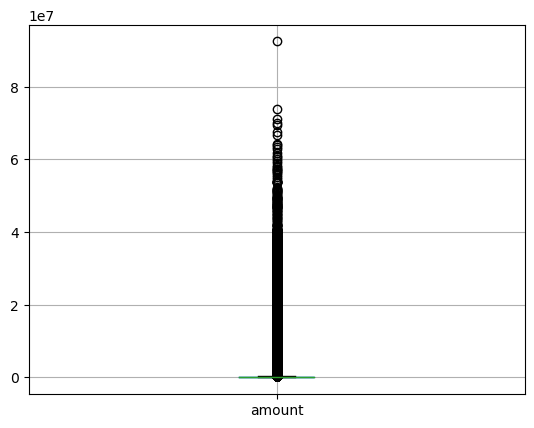

AxesSubplot(0.125,0.11;0.775x0.77)


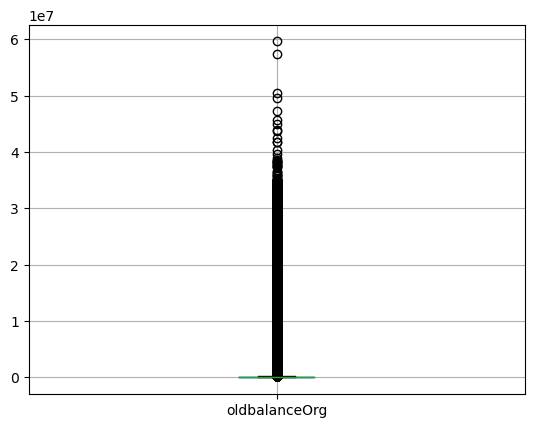

AxesSubplot(0.125,0.11;0.775x0.77)


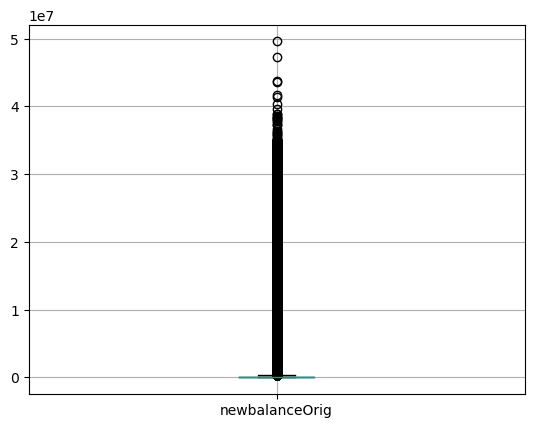

AxesSubplot(0.125,0.11;0.775x0.77)


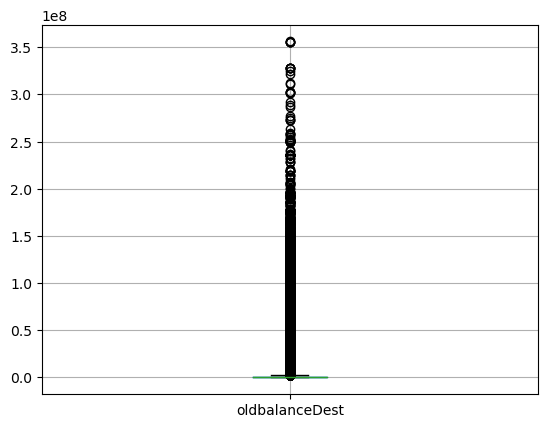

AxesSubplot(0.125,0.11;0.775x0.77)


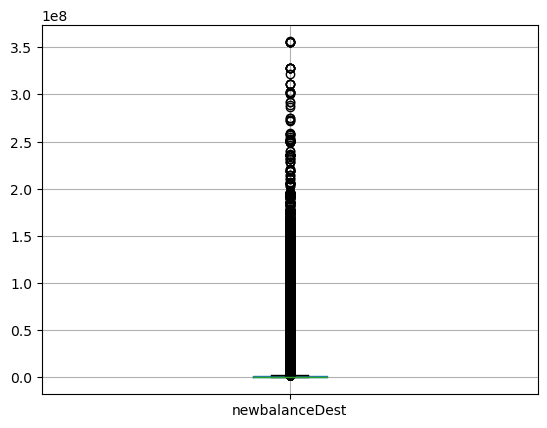

In [11]:
box_plot(df1)

<AxesSubplot:>

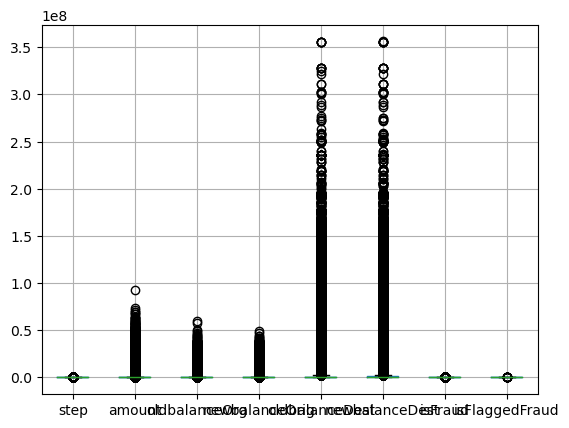

In [12]:
df1.boxplot()

In [13]:
df=df1.copy()

# Outlier Handling using IQR method

In [14]:
for x in num_filter(df).columns:
    print(x)
    percentile25 = df[x].quantile(0.25)
    percentile75 = df[x].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[x]=df[x].apply(lambda y: upper_limit if y>upper_limit else y)
    df[x]=df[x].apply(lambda y: lower_limit if y<lower_limit else y)


amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest


AxesSubplot(0.125,0.11;0.775x0.77)


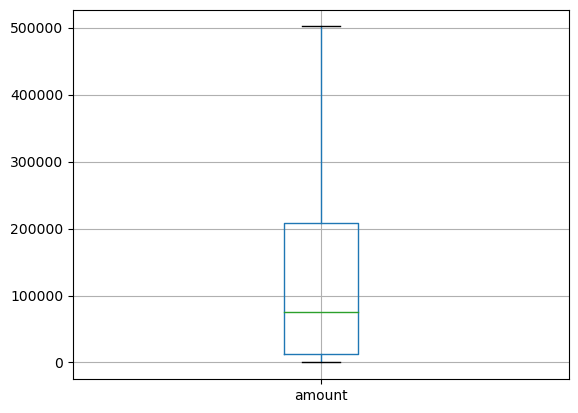

AxesSubplot(0.125,0.11;0.775x0.77)


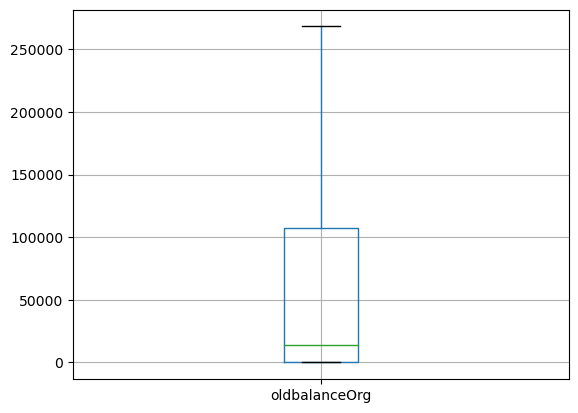

AxesSubplot(0.125,0.11;0.775x0.77)


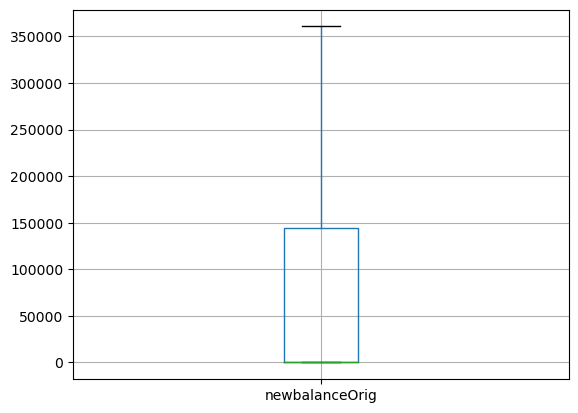

AxesSubplot(0.125,0.11;0.775x0.77)


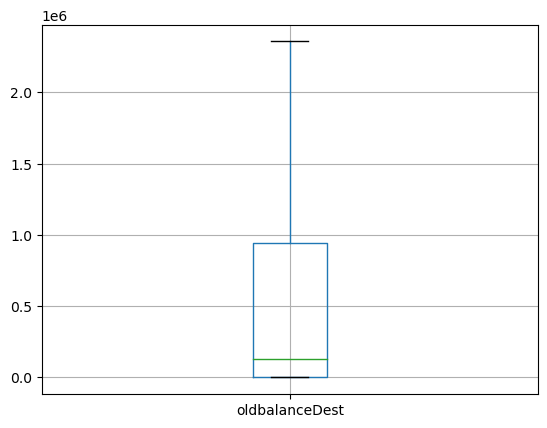

AxesSubplot(0.125,0.11;0.775x0.77)


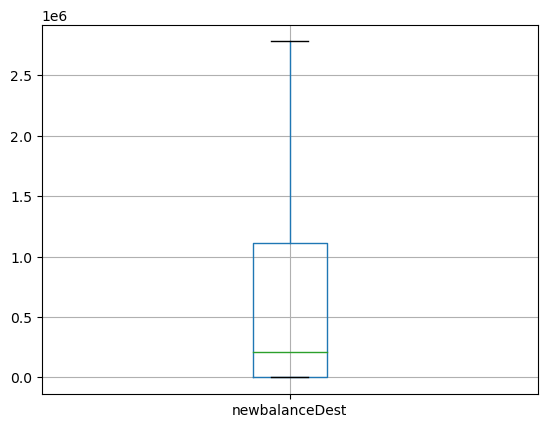

In [15]:
box_plot(df)


Result : Outliers adjusted

# Check scale

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

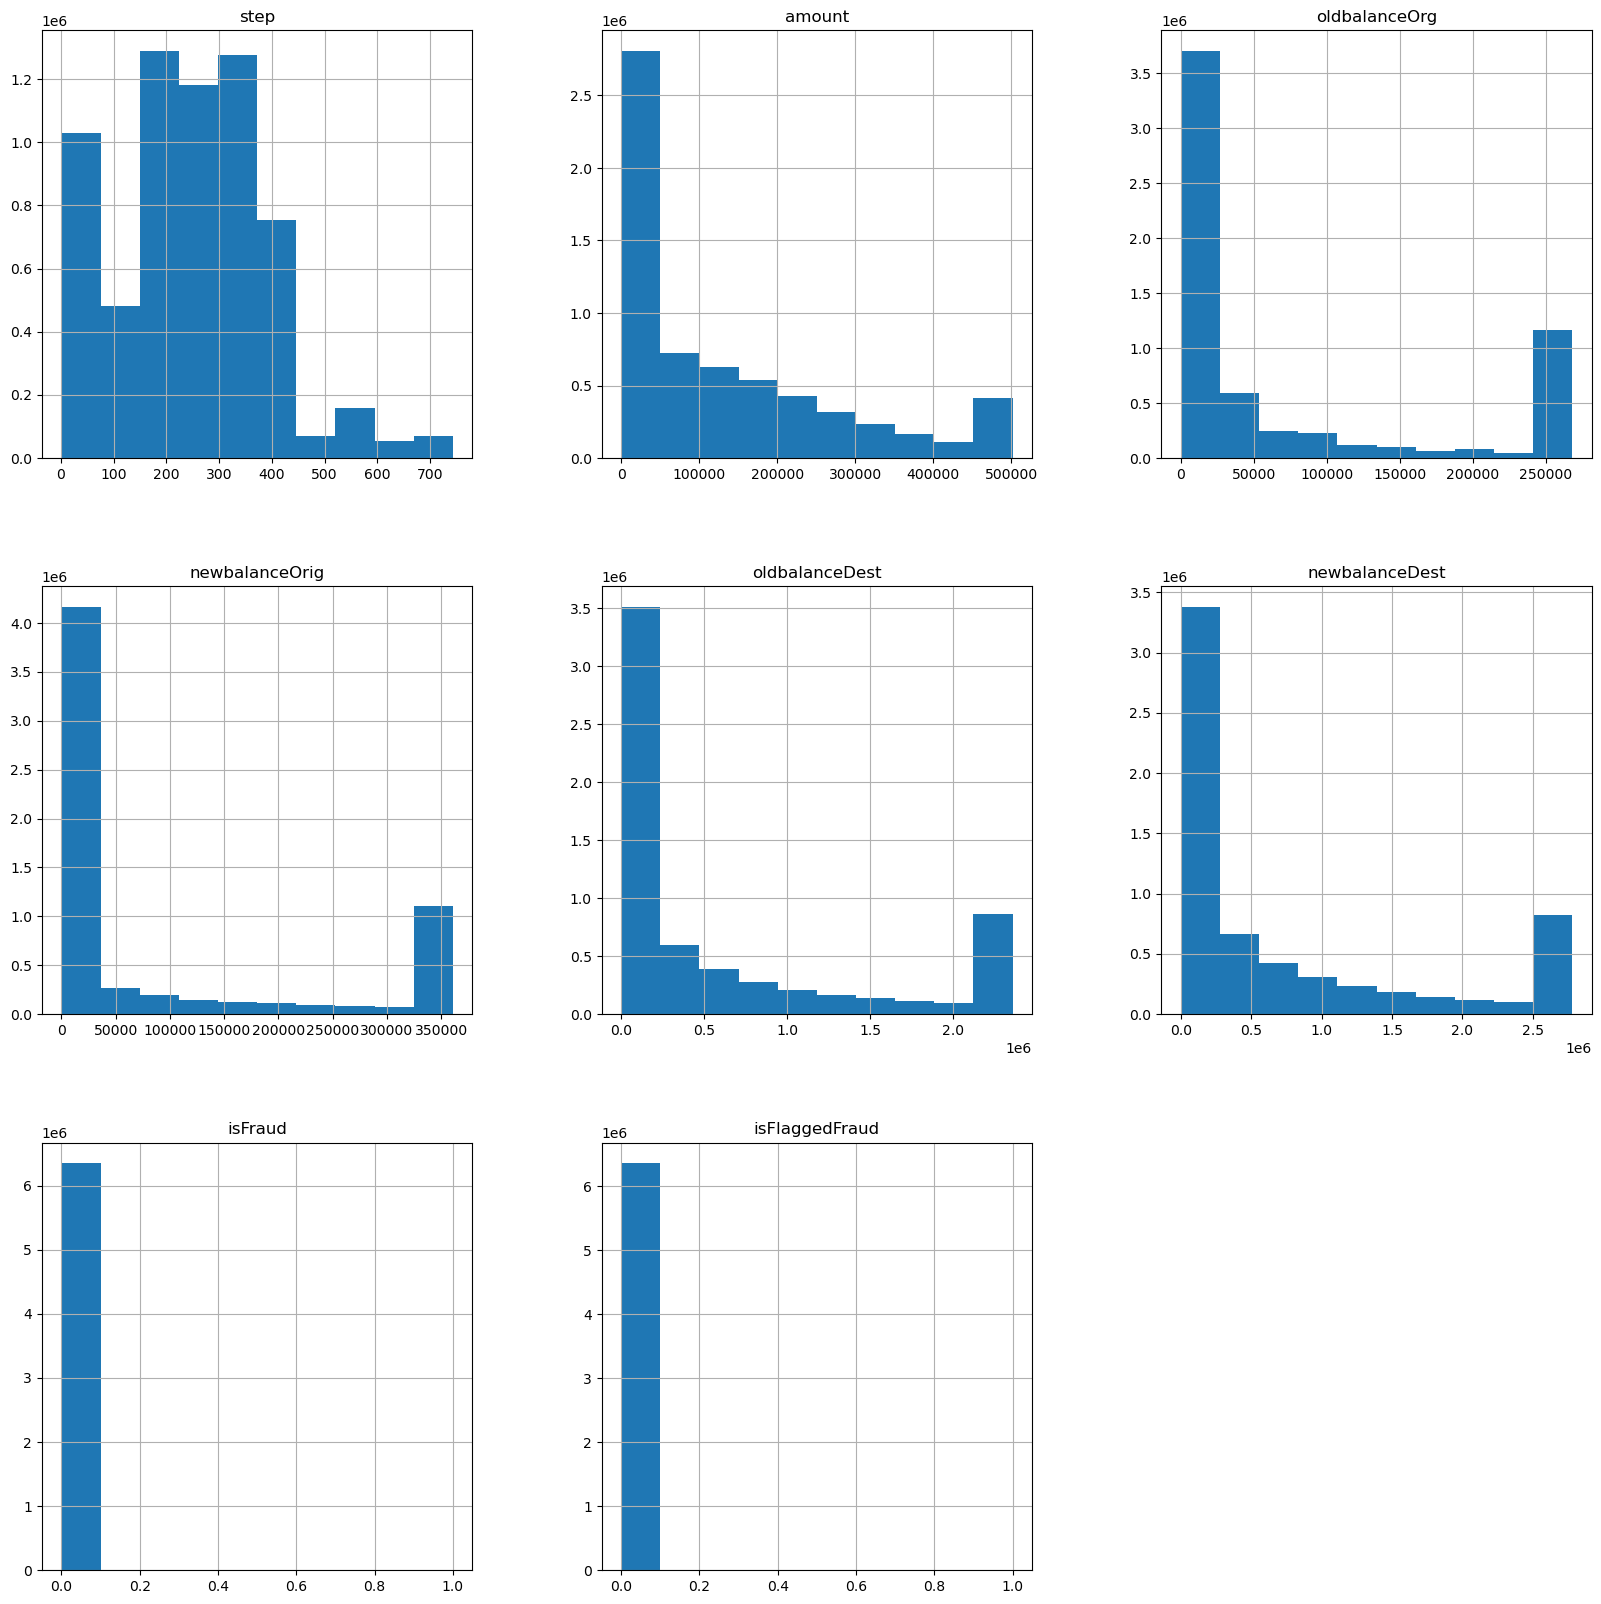

In [16]:
df.hist(figsize=(20,20))

Result : scaling needed

# Data preprocessor

Objective : According to the results obtained from data analysis, Perform an accurate data preprocessor.
Results from data analysis
1) Drop the columns with nominal values 'nameDest' and 'nameOrig'
2) Perform onehot encoding on categorical features
3) Perform scaling on numerical features

In [17]:
def preprocessor(data):
    y=data['isFraud']
    data=data.drop('isFraud',axis=1)
    df=data.copy()
    df=df.drop(['nameDest','nameOrig'],axis=1)
    cat_idx = df.columns.get_indexer(df.select_dtypes('object').columns)
    cat_est=[('onehot',OneHotEncoder(sparse=False))]
    cat_pipe=Pipeline(steps=cat_est)

    num_idx=df.columns.get_indexer(df.select_dtypes(['int64','float64']).columns)
    num_est=[('scaler',MinMaxScaler())]       
    num_pipe=Pipeline(steps=num_est)  

    transform=ColumnTransformer(transformers=[('num_process',num_pipe,num_idx),('cat_process',cat_pipe,cat_idx)])
    features=transform.fit_transform(df)
    return features,y
    


# Sampling

In [18]:
from sklearn.model_selection import train_test_split

data=df.copy()
y=np.array(data['isFraud']).reshape(-1,1)
data=data.drop('isFraud',axis=1)

x_sample_1,x_sample_2,y_sample_1,y_sample_2=train_test_split(data,y,train_size=100000,stratify=y)

In [19]:
x_sample_1.shape,y_sample_1.shape

((100000, 10), (100000, 1))

In [20]:
df2=pd.DataFrame(data=x_sample_1)
df2['isFraud']=y_sample_1

# Preprocessed data

In [21]:
x,y=preprocessor(df2)

# Model training

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)

# Model Performance measure

In [23]:
def cls_report(est):
  y_pred=est.predict(x_test)
  print(classification_report(y_test,y_pred))
  return 'Done'

# Finding best estimator


In [24]:
train_score=[]
test_score=[]
est=[['Lr',LogisticRegression(max_iter=5000)],['SVC',SVC()],['KNN',KNeighborsClassifier()],['Dec_Tree',DecisionTreeClassifier()]]
for x in est:
    x[1].fit(x_train,y_train)
    train_score.append(x[1].score(x_train,y_train))
    test_score.append(x[1].score(x_test,y_test))
    print(x[0])
    print(cls_report(x[1]))

Lr
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       0.67      0.06      0.11        32

    accuracy                           1.00     25000
   macro avg       0.83      0.53      0.56     25000
weighted avg       1.00      1.00      1.00     25000

Done
SVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       1.00      0.28      0.44        32

    accuracy                           1.00     25000
   macro avg       1.00      0.64      0.72     25000
weighted avg       1.00      1.00      1.00     25000

Done


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       0.65      0.34      0.45        32

    accuracy                           1.00     25000
   macro avg       0.82      0.67      0.72     25000
weighted avg       1.00      1.00      1.00     25000

Done
Dec_Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       0.67      0.69      0.68        32

    accuracy                           1.00     25000
   macro avg       0.83      0.84      0.84     25000
weighted avg       1.00      1.00      1.00     25000

Done


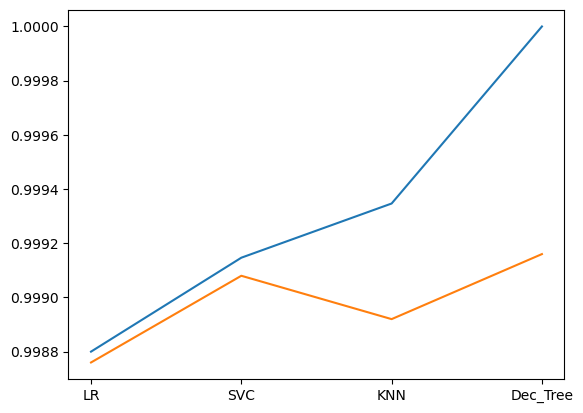

In [25]:
axis=['LR','SVC','KNN','Dec_Tree']
plt.plot(axis,train_score)
plt.plot(axis,test_score)
plt.show()

Result : Taking Support vector classifier

# Hyperparameter tuning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       1.00      0.06      0.12        32

    accuracy                           1.00     25000
   macro avg       1.00      0.53      0.56     25000
weighted avg       1.00      1.00      1.00     25000

Done
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       1.00      0.28      0.44        32

    accuracy                           1.00     25000
   macro avg       1.00      0.64      0.72     25000
weighted avg       1.00      1.00      1.00     25000

Done
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24968
           1       1.00      0.41      0.58        32

    accuracy                           1.00     25000
   macro avg       1.00      0.70      0.79     25000
weighted avg       1.00      1.00      1.00     25000

Done
    

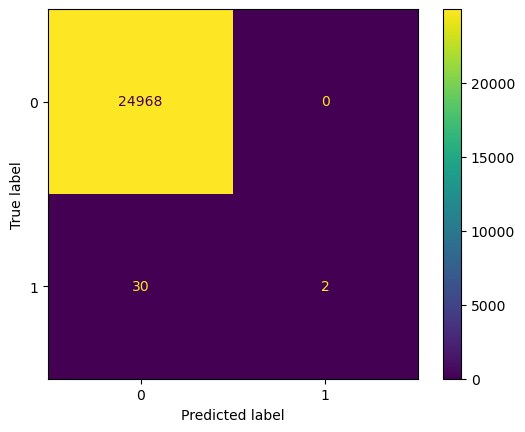

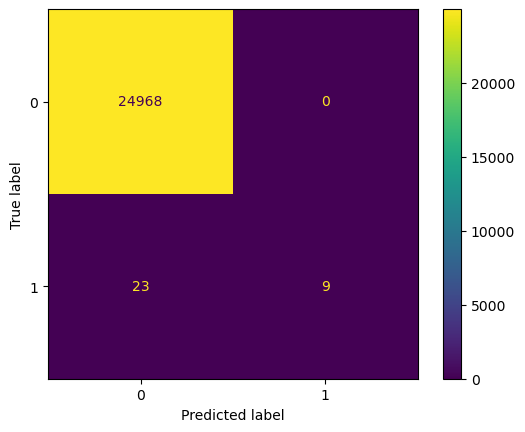

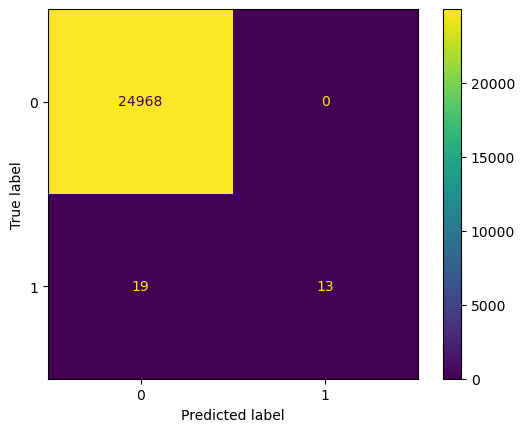

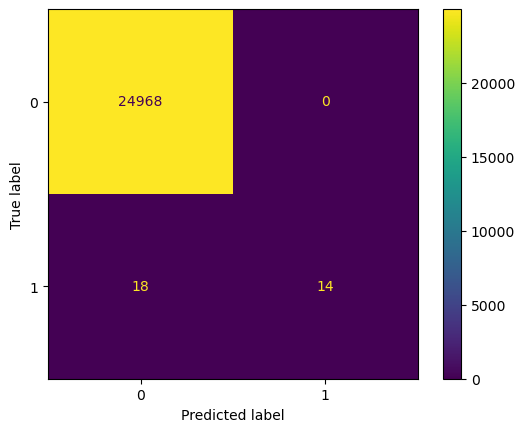

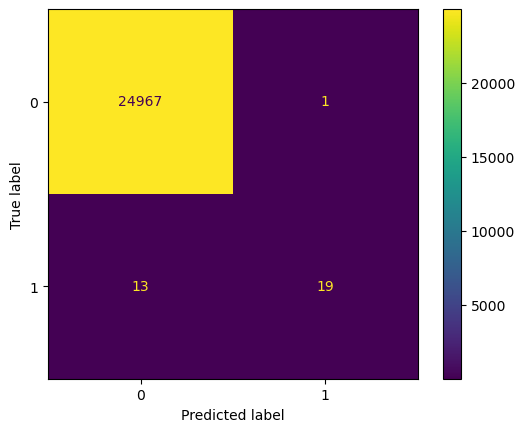

In [26]:
c_grid=[0.5,1,5,10,20]
for c in c_grid:
    svc=SVC(C=c)
    svc.fit(x_train,y_train)
    print(cls_report(svc))
    res=svc.predict(x_test)
    print(ConfusionMatrixDisplay.from_predictions(y_test,res))


Result : Taking value of C = 10

In [40]:
svc=SVC(C=10)
svc.fit(x_train,y_train)

SVC(C=10)

# Validating Model

In [41]:
df_valid=df[:1000]
x_val,y_val=preprocessor(df_valid)
svc.score(x_val,y_val)

0.993

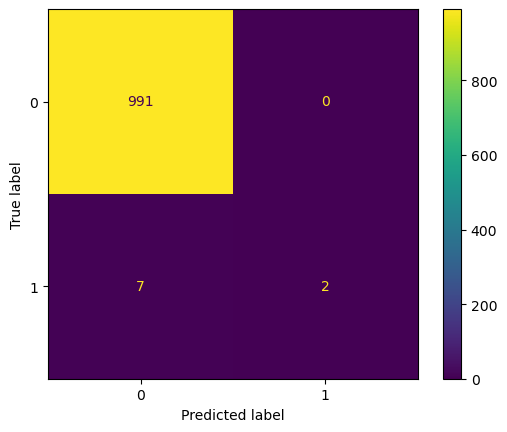

In [42]:
val_pred=svc.predict(x_val)
print(ConfusionMatrixDisplay.from_predictions(y_val,val_pred))


# Result

The estimator for predicting fraudulent transactions is using the support vector classifier algorithm with regularisation parameter C=10.
The features used for prediction are,
    'step', 'type', 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest' and 'isFlaggedFraud'.
    
